In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv("real_estate_data_version_2.csv")
# Vérifier si 'Prix' est une chaîne, sinon convertir
if data['Prix'].dtype != 'object':
    data['Prix'] = data['Prix'].astype(str)

# Nettoyage de la colonne "Prix"
data['Prix'] = data['Prix'].str.replace(' ', '', regex=False)  # Supprimer les espaces
data['Prix'] = data['Prix'].str.replace('[^0-9.]', '', regex=True)  # Garder uniquement les chiffres et '.'

# Convertir en numérique (remplacer les erreurs par NaN)
data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')

# Convertir "Modifiée" en datetime
data['Modifiée'] = pd.to_datetime(data['Modifiée'], errors='coerce')

# Vérifier les résultats
print(data[['Région', 'Prix', 'Modifiée']].head())
print(f"Nombre de lignes avec 'Prix' manquant : {data['Prix'].isnull().sum()}")






            Région        Prix   Modifiée
0         Hammamet  15000000.0 2024-04-12
1    Cite Ennasr 2  13000000.0 2024-04-12
2    Le Kram Ouest       370.0 2024-04-12
3  Jardins d'el Me      1800.0 2024-04-12
4    Cite Ennasr 2       860.0 2024-04-12
Nombre de lignes avec 'Prix' manquant : 3


In [5]:
missing_prices = data['Prix'].isnull().sum()
total_rows = len(data)
print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes avec un prix manquant : {missing_prices}")


Nombre total de lignes : 1250
Nombre de lignes avec un prix manquant : 3


In [7]:
# Garder uniquement les lignes où "Nature" est "Vente"
data = data[data["Nature"] == "Vente"]

# Vérifier les premières lignes du nouveau DataFrame
print(data.head())


             Région Nature         Type                  Texte annonce  \
0          Hammamet  Vente      Maisons           Villa a hammamet sud   
1     Cite Ennasr 2  Vente      Maisons           Villa avec piscine a   
18  Jardins de Cart  Vente  App. 3 pièc       Un appartement s3 vide m   
19       El Mourouj  Vente  App. 3 pièc             Appartement nawres   
24       El Mourouj  Vente  App. 4 pièc  Appartement mourouj 3 2 étage   

          Prix   Modifiée  
0   15000000.0 2024-04-12  
1   13000000.0 2024-04-12  
18    890000.0 2024-04-12  
19    107000.0 2024-04-12  
24    170000.0 2024-04-12  


In [9]:
data.to_csv("filtered_data.csv", index=False, encoding="utf-8")
print("Données filtrées sauvegardées dans 'filtered_data.csv'.")


Données filtrées sauvegardées dans 'filtered_data.csv'.


In [11]:
# Groupby et statistiques descriptives
grouped_data = data.groupby('Région').describe()
print("Statistiques descriptives par région :")
print(grouped_data)

# Flatten les données groupées pour une vue plus claire
unstacked = grouped_data.unstack()
print("Groupby avec unstack :")
print(unstacked)


Statistiques descriptives par région :
                 Prix                                                         \
                count       mean        min        25%        50%        75%   
Région                                                                         
Ain Zaghouan      8.0   504500.0   160000.0   424500.0   560000.0   640000.0   
Akouda            1.0  1550000.0  1550000.0  1550000.0  1550000.0  1550000.0   
Ariana            4.0   400750.0    90000.0   174000.0   381500.0   608250.0   
Arkou             1.0  1350000.0  1350000.0  1350000.0  1350000.0  1350000.0   
Bab Bhar          2.0   245000.0   240000.0   242500.0   245000.0   247500.0   
...               ...        ...        ...        ...        ...        ...   
Soliman           1.0   140000.0   140000.0   140000.0   140000.0   140000.0   
Zaghouan          2.0   475000.0   370000.0   422500.0   475000.0   527500.0   
Zaouiet Sousse    1.0   390000.0   390000.0   390000.0   390000.0   390000.0   
Z

In [13]:
# Vérifier les doublons
duplicates = data.duplicated()
print("Doublons détectés :")
print(data[duplicates])

# Supprimer les doublons
data = data.drop_duplicates()
print("Données après suppression des doublons :")
print(data.head())


Doublons détectés :
        Région Nature         Type                  Texte annonce      Prix  \
25  El Mourouj  Vente  App. 4 pièc  Appartement mourouj 3 2 étage  170000.0   

     Modifiée  
25 2024-04-12  
Données après suppression des doublons :
             Région Nature         Type                  Texte annonce  \
0          Hammamet  Vente      Maisons           Villa a hammamet sud   
1     Cite Ennasr 2  Vente      Maisons           Villa avec piscine a   
18  Jardins de Cart  Vente  App. 3 pièc       Un appartement s3 vide m   
19       El Mourouj  Vente  App. 3 pièc             Appartement nawres   
24       El Mourouj  Vente  App. 4 pièc  Appartement mourouj 3 2 étage   

          Prix   Modifiée  
0   15000000.0 2024-04-12  
1   13000000.0 2024-04-12  
18    890000.0 2024-04-12  
19    107000.0 2024-04-12  
24    170000.0 2024-04-12  


In [15]:
# Vérifier les valeurs manquantes
missing_data = data.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_data)

# Remplir les valeurs manquantes avec une stratégie (par exemple, moyenne ou médiane)
data['Prix'] = data['Prix'].fillna(data['Prix'].median())
print("Données après traitement des valeurs manquantes :")
print(data.isnull().sum())


Nombre de valeurs manquantes par colonne :
Région           0
Nature           0
Type             0
Texte annonce    0
Prix             0
Modifiée         0
dtype: int64
Données après traitement des valeurs manquantes :
Région           0
Nature           0
Type             0
Texte annonce    0
Prix             0
Modifiée         0
dtype: int64


In [17]:
# Trier par prix croissant
data = data.sort_values(by='Prix', ascending=True)
print("Données triées par prix :")
print(data.head())

# Mélanger les données
data = data.sample(frac=1).reset_index(drop=True)
print("Données mélangées :")
print(data.head())


Données triées par prix :
           Région Nature         Type                  Texte annonce     Prix  \
998      Khelidia  Vente     Surfaces                 Local khelidia  55000.0   
250          Sfax  Vente  App. 3 pièc  Appart 60m2 avenue de algerie  60000.0   
519      Hammamet  Vente      Maisons       Av villa s5 avec piscine  65000.0   
624    Bab Menara  Vente        Autre       Fond de commerce d'un re  75000.0   
419  Sidi Bou Ali  Vente      Maisons               Maison a salmoun  75000.0   

      Modifiée  
998 2024-04-12  
250 2024-04-12  
519 2024-04-12  
624 2024-04-12  
419 2024-04-12  
Données mélangées :
            Région Nature         Type             Texte annonce      Prix  \
0        La Soukra  Vente  App. 2 pièc      Apprt encours de con  225000.0   
1     Chatt Meriem  Vente  App. 3 pièc      S2 dans une residenc  245000.0   
2  Cite Ennour Jaa  Vente  App. 4 pièc  Appartement s3 à nour ja  150000.0   
3    Cite Ennasr 2  Vente  App. 5 pièc   S4 spacieux 

Valeurs manquantes par colonne :
 Région           0
Nature           0
Type             0
Texte annonce    0
Prix             0
Modifiée         0
dtype: int64


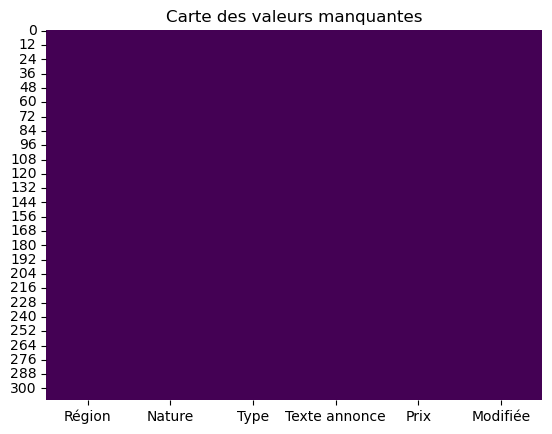

In [19]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Visualisation des valeurs manquantes
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des valeurs manquantes")
plt.show()


In [21]:
# Discrétiser la colonne "Prix" en 4 catégories
data['Prix_Catégorie'] = pd.qcut(data['Prix'], q=4, labels=['Bas', 'Moyen-Bas', 'Moyen-Haut', 'Haut'])
print("Données discrétisées :")
print(data[['Prix', 'Prix_Catégorie']].head())


Données discrétisées :
       Prix Prix_Catégorie
0  225000.0            Bas
1  245000.0      Moyen-Bas
2  150000.0            Bas
3  700000.0     Moyen-Haut
4  320000.0      Moyen-Bas


In [23]:
# Agrégation par région avec somme et moyenne
data['Somme_Prix'] = data.groupby('Région')['Prix'].transform('sum')
data['Moyenne_Prix'] = data.groupby('Région')['Prix'].transform('mean')
print("Données avec colonnes agrégées :")
print(data[['Région', 'Prix', 'Somme_Prix', 'Moyenne_Prix']].head())


Données avec colonnes agrégées :
            Région      Prix  Somme_Prix  Moyenne_Prix
0        La Soukra  225000.0  16052000.0  6.979130e+05
1     Chatt Meriem  245000.0   2340000.0  3.342857e+05
2  Cite Ennour Jaa  150000.0    277000.0  1.385000e+05
3    Cite Ennasr 2  700000.0  18235000.0  2.605000e+06
4    Cite Ennasr 1  320000.0   2385000.0  3.975000e+05


In [29]:
import numpy as np

# Fonction pour extraire le type général
def extraire_type(type_str):
    if "App" in type_str:
        return "Appartement"
    elif "Maison" in type_str:
        return "Maison"
    elif "Surface" in type_str:
        return "Surface"
    else:
        return "Autre"

# Fonction pour extraire le nombre de chambres/pièces
def extraire_nombre_chambres(type_str):
    # Trouver un chiffre suivi de "piÃ¨c" ou "pièce"
    match = re.search(r'(\d+)\s*pi', type_str, re.IGNORECASE)
    return int(match.group(1)) if match else np.nan

# Appliquer les transformations
data['Type_general'] = data['Type'].apply(extraire_type)
data['Nombre_de_chambres'] = data['Type'].apply(extraire_nombre_chambres)

# Ajouter une nouvelle colonne pour les salles de bain (initialisée à NaN)
data['Nombre_de_salle_de_bain'] = np.nan  # Vous pourrez remplir cette colonne plus tard.

# Vérifier les résultats
print(data[['Type', 'Type_general', 'Nombre_de_chambres', 'Nombre_de_salle_de_bain']].head())


          Type Type_general  Nombre_de_chambres  Nombre_de_salle_de_bain
0  App. 2 pièc  Appartement                 2.0                      NaN
1  App. 3 pièc  Appartement                 3.0                      NaN
2  App. 4 pièc  Appartement                 4.0                      NaN
3  App. 5 pièc  Appartement                 5.0                      NaN
4  App. 3 pièc  Appartement                 3.0                      NaN


In [31]:
print(data.head())

            Région Nature         Type             Texte annonce      Prix  \
0        La Soukra  Vente  App. 2 pièc      Apprt encours de con  225000.0   
1     Chatt Meriem  Vente  App. 3 pièc      S2 dans une residenc  245000.0   
2  Cite Ennour Jaa  Vente  App. 4 pièc  Appartement s3 à nour ja  150000.0   
3    Cite Ennasr 2  Vente  App. 5 pièc   S4 spacieux et lumineux  700000.0   
4    Cite Ennasr 1  Vente  App. 3 pièc  Appartement s2 à cité en  320000.0   

    Modifiée Prix_Catégorie  Somme_Prix  Moyenne_Prix Type_general  \
0 2024-04-12            Bas  16052000.0  6.979130e+05  Appartement   
1 2024-04-12      Moyen-Bas   2340000.0  3.342857e+05  Appartement   
2 2024-04-12            Bas    277000.0  1.385000e+05  Appartement   
3 2024-04-12     Moyen-Haut  18235000.0  2.605000e+06  Appartement   
4 2024-04-12      Moyen-Bas   2385000.0  3.975000e+05  Appartement   

   Nombre_de_chambres  Nombre_de_salle_de_bain  
0                 2.0                      NaN  
1           

In [33]:
data.to_csv('data_with_added_features.csv', index=False, encoding='utf-8')  # Sans l'index


In [36]:
import numpy as np

# Ajouter une colonne "surface" initialisée à NaN
data['surface'] = np.nan

# Définir une fonction pour estimer la surface
def estimer_surface(type_general, prix):
    if pd.isna(prix) or pd.isna(type_general):
        return np.nan  # Pas de surface si données manquantes
    
    # Logique pour les appartements
    if type_general == "appartement":
        if prix < 100_000:
            return 70  # Surface estimée pour bas prix
        elif prix <= 300_000:
            return 120  # Surface moyenne
        elif prix <= 1_000_000:
            return 200  # Grand appartement
        else:
            return 300  # Très grand appartement

    # Logique pour les maisons
    elif type_general == "maison":
        if prix < 200_000:
            return 100  # Petite maison
        elif prix <= 500_000:
            return 200  # Maison moyenne
        elif prix <= 1_500_000:
            return 400  # Grande maison
        else:
            return 600  # Très grande maison

    # Logique pour les autres types
    else:
        if prix < 100_000:
            return 50  # Petites surfaces
        elif prix <= 500_000:
            return 150  # Surfaces moyennes
        else:
            return 300  # Très grandes surfaces

# Appliquer la fonction pour calculer la surface
data['surface'] = data.apply(lambda row: estimer_surface(row['Type_general'], row['Prix']), axis=1)

# Vérifier les premières lignes pour validation
print(data[['Type_general', 'Prix', 'surface']].head())


  Type_general      Prix  surface
0  Appartement  225000.0      150
1  Appartement  245000.0      150
2  Appartement  150000.0      150
3  Appartement  700000.0      300
4  Appartement  320000.0      150


In [38]:
data.to_csv('data_with_surface.csv', index=False, encoding='utf-8')  # Sans l'index


In [43]:
# Fonction pour estimer le nombre de chambres avec prix/m²
def estimer_chambres(surface, prix):
    if pd.isna(surface) or pd.isna(prix):
        return np.nan  # Retourner NaN si surface ou prix manquants
    
    # Calcul du prix par mètre carré
    prix_m2 = prix / surface
    
    # Logique révisée en fonction de la surface et du prix/m²
    if surface < 60:
        return 1  # Studio ou petite chambre
    elif surface < 90:
        return 2  # Appartement T2
    elif surface < 120:
        if prix_m2 > 2000:
            return 2  # Haut standing
        else:
            return 3  # Standard
    elif surface < 180:
        if prix_m2 > 1500:
            return 3  # Appartement spacieux haut standing
        else:
            return 4  # Maison standard
    elif surface <= 300:
        if prix_m2 > 2000:
            return 4  # Maison haut standing
        else:
            return 5  # Grande maison ou villa
    else:
        return np.nan  # Surface en dehors de la plage définie

# Remplir les valeurs manquantes de "Nombre_de_chambres"
data['Nombre_de_chambres'] = data.apply(
    lambda row: row['Nombre_de_chambres'] if not pd.isna(row['Nombre_de_chambres']) else estimer_chambres(row['surface'], row['Prix']),
    axis=1
)

# Vérifier les premières lignes pour validation
print(data[['surface', 'Prix', 'Nombre_de_chambres']].head())


   surface      Prix  Nombre_de_chambres
0      150  225000.0                 2.0
1      150  245000.0                 3.0
2      150  150000.0                 4.0
3      300  700000.0                 5.0
4      150  320000.0                 3.0


In [45]:
data.to_csv('data_with_surface_and_chambres.csv', index=False, encoding='utf-8')  # Sans l'index


In [53]:
# Modifier "type_general" si les conditions sont remplies
data['Type_general'] = data.apply(
    lambda row: 'Villa' if row['Type_general'] == 'Maison' and row['surface'] == 300 else row['Type_general'],
    axis=1
)

# Vérifier les premières lignes pour validation
print(data[['Type_general', 'surface']].head())


  Type_general  surface
0  Appartement      150
1  Appartement      150
2  Appartement      150
3  Appartement      300
4  Appartement      150


In [58]:
data.to_csv('data_filtered_before_merging.csv', index=False, encoding='utf-8')  # Sans l'index
